<a href="https://colab.research.google.com/github/wdgstl/assignment4/blob/main/WDG_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [1]:
#1:
#Summary of Decisions:

#Badly Scaled Variables

# Make_Year is not scaled the best, but it is a linear measure and it would not make sense to transform it
# Mileage_Run is slightly right skewed. I tried applying log and arcsinh transformations, but they did not help.
# Seating Capacity has so few unique values, so I will not change it
# Price is right skewed. I see this being a response variable, so I applied both log and arcsin transformations, and they both helped scale the variable

#Outliers:

# Seating Capacity - There is a large class imbalance, so I am deciding to focus on cars that just seat 5.
# Fuel Type - dropped observations with petrol+cng because there were only 2
# Price - dropped the high outlier from Price

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

cars_df = pd.read_csv("/content/cars_hw.csv")

#Drop other index column
cars_df = cars_df.drop('Unnamed: 0', axis=1)

print(cars_df.info())
print(cars_df.head())

#Get null values for each column
print(cars_df.isna().sum())

#Histograms for Quants
cars_df['Make_Year'].hist()
plt.title("Make_Year")
plt.show()

cars_df['Mileage_Run'].hist()
plt.title("Mileage_Run")
plt.show()

#Transformations for Mileage_Run:

cars_df['Mileage_Run_Log'] = np.log(cars_df['Mileage_Run'])
cars_df['Mileage_Run_Log'].hist()
plt.title("Mileage_Run_Log")
plt.show()

cars_df['Mileage_Run_Arcsinh'] = np.arcsinh(cars_df['Mileage_Run'])
cars_df['Mileage_Run_Arcsinh'].hist()
plt.title("Mileage_Run_Arcsinh")
plt.show()

cars_df['Seating_Capacity'].hist()
plt.title("Seating_Capacity")
plt.show()

cars_df['Price'].hist()
plt.title("Price")
plt.show()

#Transformations for Price:

cars_df['Price_Log'] = np.log(cars_df['Price'])
cars_df['Price_Log'].hist()
plt.title("Price_Log")
plt.show()

cars_df['Price_Arcsinh'] = np.arcsinh(cars_df['Price'])
cars_df['Price_Arcsinh'].hist()
plt.title("Price_Arcsinh")
plt.show()

#Boxplots for Quants

sns.boxplot(cars_df['Make_Year'])
plt.title("Make_Year")
plt.show()

sns.boxplot(cars_df['Mileage_Run'])
plt.title("Mileage_Run")
plt.show()

sns.boxplot(cars_df['Seating_Capacity'])
plt.title("Seating_Capacity")
plt.show()

#Value Counts for Quals
print(cars_df['Make'].value_counts())
print(cars_df['Make_Year'].value_counts())
print(cars_df['Color'].value_counts())
print(cars_df['Body_Type'].value_counts())


print(cars_df['No_of_Owners'].value_counts())
print(cars_df['Fuel_Type'].value_counts())

cars_df = cars_df[cars_df['Fuel_Type'] != 'petrol+cng']
print(cars_df['Fuel_Type'].value_counts())

print(cars_df['Transmission'].value_counts())

print(cars_df['Transmission_Type'].value_counts())
#cars_df['Transmission_Type'] = pd.to_numeric(cars_df['Transmission_Type'])



#Remove Outliers for Seating_Capacity
print(cars_df['Seating_Capacity'].value_counts())
cars_df = cars_df[cars_df['Seating_Capacity'] == 5]
print(cars_df['Seating_Capacity'].value_counts())

#Drop the highest outlier
cars_df = cars_df[cars_df['Price'] != cars_df['Price'].max()]

sns.boxplot(cars_df['Price'])
plt.title("Price")
plt.show()

sns.scatterplot(y = cars_df['Price'], x =cars_df['Mileage_Run'] )
plt.show()


FileNotFoundError: ignored

count    927.000000
mean      13.400188
std        0.447587
min       12.375815
25%       13.059423
50%       13.398479
75%       13.675673
max       14.518113
Name: Price_Log, dtype: float64


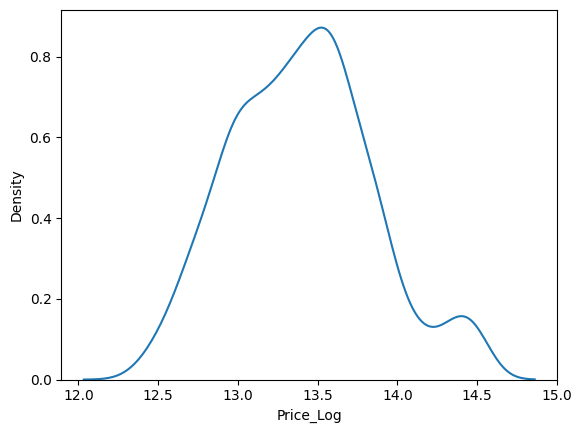

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286   
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636   
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493   
Honda           70.0  13.545562  0.341065  12.663497  13.271214  13.582316   
Hyundai        305.0  13.368511  0.398781  12.421184  13.091904  13.366094   
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265   
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105   
MG Motors       34.0  14.442770  0.063446  14.278615  14.405917  14.429615   
Mahindra         2.0  13.974857  0.120444  13.889690  13.932274  13.974857   
Maruti Suzuki  280.0  13.209986  0.368822  12.375815  12.925739  13.164460   
Nissan           4.0  13.641194  0.392610  13.071070  13.537775 

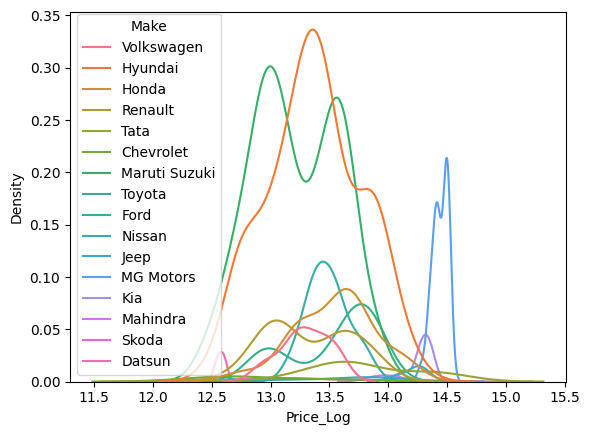

In [ ]:
#2:
#It looks like MG Motors has the highest price, along with Kia. In general, the Log of the prices is normally distributed, with a spike in density towards the higher priced sections, indicating that there are certain cars that sell for the same range of higher prices.
print(cars_df['Price_Log'].describe())

sns.kdeplot(x=cars_df['Price_Log'])
plt.show()

print(cars_df['Price_Log'].groupby(cars_df['Make']).describe())

sns.kdeplot(x=cars_df['Price_Log'], hue = cars_df['Make']) # Grouped by Make
plt.show()

In [ ]:
#3:

from sklearn.model_selection import train_test_split
print(cars_df.info())
## Preprocess Data:
y = cars_df['Price_Log']
X = cars_df.drop(['Price_Log', 'Price', 'Mileage_Run_Arcsinh', 'Price_Arcsinh', 'Mileage_Run_Log'], axis=1)

# print(X.info())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)
#The problem with the train test split is that it is randomized and it does not guarantee that all categories from a given column

print(X_train["Make"].value_counts())
print(X_test["Make"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 0 to 975
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 927 non-null    object 
 1   Make_Year            927 non-null    int64  
 2   Color                927 non-null    object 
 3   Body_Type            927 non-null    object 
 4   Mileage_Run          927 non-null    int64  
 5   No_of_Owners         927 non-null    object 
 6   Seating_Capacity     927 non-null    int64  
 7   Fuel_Type            927 non-null    object 
 8   Transmission         927 non-null    object 
 9   Transmission_Type    927 non-null    object 
 10  Price                927 non-null    int64  
 11  Mileage_Run_Log      927 non-null    float64
 12  Mileage_Run_Arcsinh  927 non-null    float64
 13  Price_Log            927 non-null    float64
 14  Price_Arcsinh        927 non-null    float64
dtypes: float64(4), int64(4), object(7)
memor

In [ ]:
#4:
# Model 2 (that uses the categoricals) performs better than Model 1. One thing to note is that it uses signficantly more variables, and the variables that it uses would seem to have a larger effect on the response
# Model 3 performs much better than the other models: Model 3 R^2: .79 > Model 2 R^2: .57 > Model 1 R^2: .42
# Model 3 performs the best because it uses both categorical and quantitative variables

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer

def get_RMSE(model, X_test, y_test):
  predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, predictions)
  return  np.sqrt(mse)

#MODEL 1 - does not use quant Seating Capacity because the other levels were removed during training due to heavy class imbalance
vars = ['Make_Year','Mileage_Run']

X_train_1 = X_train.loc[:,vars] # Construct data matrix
X_test_1 = X_test.loc[:,vars]

reg1 = LinearRegression().fit(X_train_1, y_train) # Fit the linear model

print("Linear Model Trained on Numeric Variables\n-----------------------------------------")
print(f'R^2: {reg1.score(X_test_1, y_test)}') # R squared measure
print(f'RMSE: {get_RMSE(reg1, X_test_1, y_test)}\n-----------------------------------------') # R squared measure


#MODEL 2
X_train_Make = pd.get_dummies(X_train['Make'])
X_test_Make = pd.get_dummies(X_test['Make'])

X_train_Color = pd.get_dummies(X_train['Color'])
X_test_Color = pd.get_dummies(X_test['Color'])

X_train_Body_Type = pd.get_dummies(X_train['Body_Type'])
X_test_Body_Type = pd.get_dummies(X_test['Body_Type'])

X_train_Fuel_Type = pd.get_dummies(X_train['Fuel_Type'])
X_test_Fuel_Type = pd.get_dummies(X_test['Fuel_Type'])

X_train_Transmission = pd.get_dummies(X_train['Transmission'])
X_test_Transmission = pd.get_dummies(X_test['Transmission'])

X_train_Transmission_Type = pd.get_dummies(X_train['Transmission_Type'])
X_test_Transmission_Type = pd.get_dummies(X_test['Transmission_Type'])


X_train_2 = pd.concat([X_train_Make, X_train_Color, X_train_Body_Type, X_train_Fuel_Type, X_train_Transmission, X_train_Transmission_Type],axis=1) # Concatenate engineered features
X_test_2 = pd.concat([X_test_Make, X_test_Color, X_test_Body_Type, X_test_Fuel_Type, X_test_Transmission, X_test_Transmission_Type],axis=1) # Concatenate engineered features

#needed to drop these because the train test split split the data in such a way that certain values were not in both train and test
X_train_2 = X_train_2.drop(['Datsun','yellow', 'Mahindra' , 'Skoda', 'golden' ,'maroon'], axis = 1)
reg2 = LinearRegression().fit(X_train_2, y_train) # Fit the linear model

print("Linear Model Trained on Categorical Variables\n-----------------------------------------")
print(f'R^2: {reg2.score(X_test_2, y_test)}') # R squared measure
print(f'RMSE: {get_RMSE(reg2, X_test_2, y_test)}\n-----------------------------------------') # R squared measure

#MODEL 3

X_train_3 = pd.concat([X_train_1, X_train_2], axis = 1)
X_test_3 = pd.concat([X_test_1, X_test_2], axis = 1)
reg3 = LinearRegression().fit(X_train_3, y_train) # Fit the linear model

print("Linear Model Trained on Numeric & Categorical Variables\n-----------------------------------------")
print(f'R^2: {reg3.score(X_test_3, y_test)}') # R squared measure
print(f'RMSE: {get_RMSE(reg3, X_test_3, y_test)}\n-----------------------------------------') # R squared measure

Linear Model Trained on Numeric Variables
-----------------------------------------
R^2: 0.42856232457623955
RMSE: 0.3329858212604924
-----------------------------------------
Linear Model Trained on Categorical Variables
-----------------------------------------
R^2: 0.5682131466665716
RMSE: 0.2894516394516195
-----------------------------------------
Linear Model Trained on Numeric & Categorical Variables
-----------------------------------------
R^2: 0.7920745312229651
RMSE: 0.2008607827541872
-----------------------------------------


In [ ]:
#5:
from sklearn.preprocessing import PolynomialFeatures
#when the degree is increased to just 2, the R^2 goes from .79 to -251.48 and the RMSE goes from 0.200 to 6.99
#Therefore, the best model from expanded features is no better than the best model from the previous question

expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander

#expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander


#
Z_train = expander.fit_transform(X_train_3) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test_3) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

reg_exp = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print("Linear Model with Polynomial Features\n-----------------------------------------")
print(f'R^2: {reg_exp.score(X_test_lm, y_test)}') # R squared measure
print(f'RMSE: {get_RMSE(reg_exp, X_test_lm, y_test)}\n-----------------------------------------') # R squared measure

Linear Model with Polynomial Features
-----------------------------------------
R^2: 0.7920745312229651
RMSE: 0.2008607827541872
-----------------------------------------


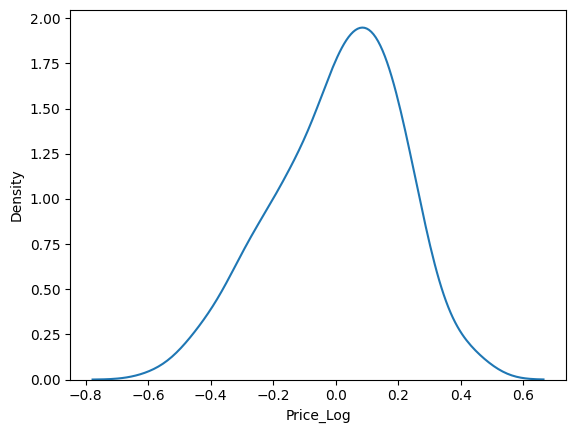

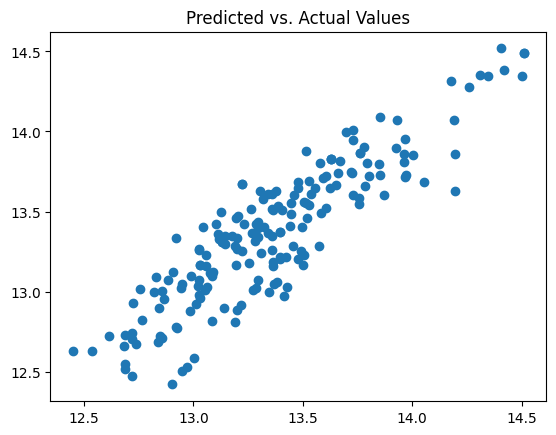

In [ ]:
#6:
# The predicted values line up very closely with the actual values along the diagonal
# The residuals are also bell shaped around 0
# According to these graphs, along with the RMSE and R^2, this is a fairly strong predictive model
## Residual plot:
predictions = reg3.predict(X_test_3)
residuals = y_test - predictions
sns.kdeplot(residuals)
plt.show()

## True versus predicted plot:
plt.scatter(x=predictions,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

Tree Model with depth = 1 
-----------------------------------------
R^2: 0.37138784828966553
RMSE: 0.34924700640459394
-----------------------------------------
Tree Model with depth = 2 
-----------------------------------------
R^2: 0.5882688488901431
RMSE: 0.2826494660602695
-----------------------------------------
Tree Model with depth = 3 
-----------------------------------------
R^2: 0.6832655115319646
RMSE: 0.247907110699936
-----------------------------------------
Tree Model with depth = 4 
-----------------------------------------
R^2: 0.7109582634863366
RMSE: 0.2368217494578291
-----------------------------------------
Tree Model with depth = 5 
-----------------------------------------
R^2: 0.7222041068221416
RMSE: 0.23216899245111577
-----------------------------------------
Tree Model with depth = 6 
-----------------------------------------
R^2: 0.7673174922102965
RMSE: 0.2124825032308242
-----------------------------------------
Tree Model with depth = 7 
-----------

<function matplotlib.pyplot.show(close=None, block=None)>

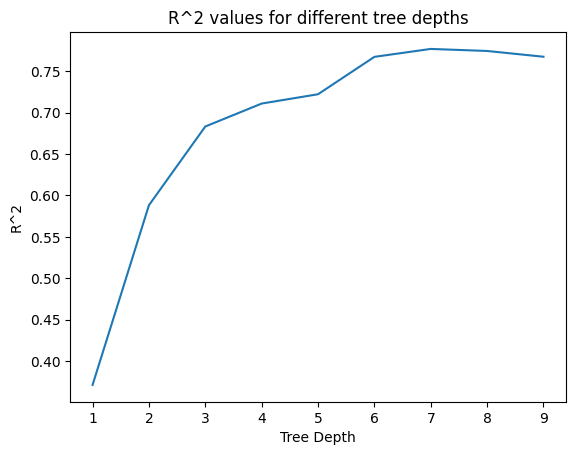

In [ ]:
#7:
#It appears that the optimal tree depth is 8. This is the absolute maximum.
from sklearn import tree

r_squares = []
for d in range(1, 10):
  tree_model = tree.DecisionTreeRegressor(max_depth=d).fit(X_train_3, y_train)
  print(f'Tree Model with depth = {d} \n-----------------------------------------')
  print(f'R^2: {tree_model.score(X_test_3, y_test)}') # R squared measure
  r_squares.append(tree_model.score(X_test_3, y_test))
  print(f'RMSE: {get_RMSE(tree_model, X_test_3, y_test)}\n-----------------------------------------') # R squared measure

sns.lineplot(x = [1,2,3,4,5,6,7,8,9], y = r_squares)
plt.title("R^2 values for different tree depths")
plt.xlabel("Tree Depth")
plt.ylabel("R^2")
plt.show


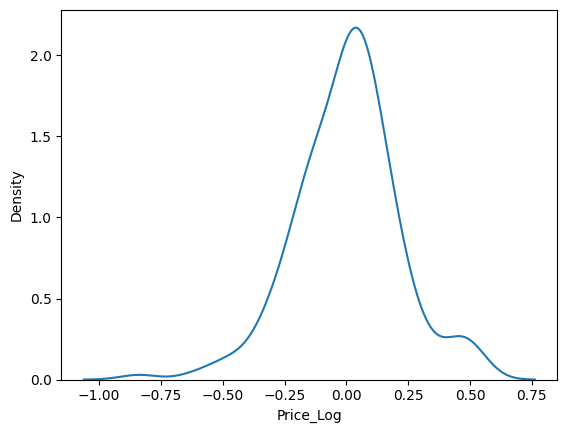

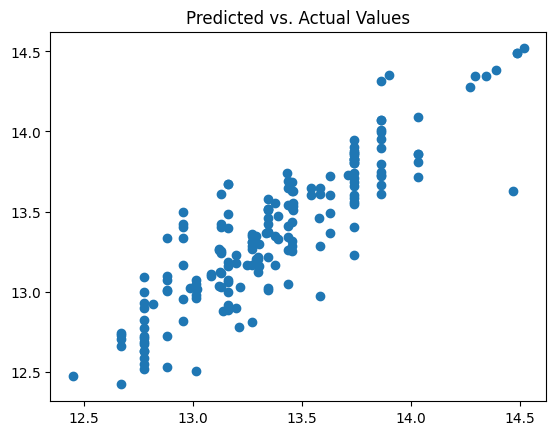

In [ ]:
#8:
# The predicted values also line up very closely with the actual values along the diagonal
# The residuals are also bell shaped around 0
# According to these graphs, along with the RMSE and R^2, this is a fairly strong predictive model
#Still, the linear model is slightly better
## Residual plot:
tree_model = tree.DecisionTreeRegressor(max_depth=8).fit(X_train_3, y_train)

predictions = tree_model.predict(X_test_3)
residuals = y_test - predictions
sns.kdeplot(residuals)
plt.show()

## True versus predicted plot:
plt.scatter(x=predictions,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

In [ ]:
#9:
# The best linear model was the model that was trained on both quantitative and categorical variables, and it has a R^2 of .79 and a RMSE of .200
# The best tree model was the model that was had a depth of 3, and it has a R^2 of .77 and a RMSE of .209.
# According to these metrics, the linear model is a more accurate predictor of price. However, I could look into more metrics and conduct more testing cross validation to verify this.


**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [ ]:
#1:
#Couples that use tend to have smaller sized families compared with those who do not use birth control
#Specifically, there are more people that do not use birth control that have between 0-1 kids, but those who use long term birth control have the most in the category of having 3 children.
# Those who do not use birth control have higher numbers of children, as there are more observations between 8-16 children
# Additionally, when combining those in the categories of long and short term birth control, there are more observations that have between 2-7 kids
# It is difficult to make a definite conclusion here due to class imbalance between the different groups
df = pd.read_csv('/content/contraception_hw.csv')
df = df.drop('Unnamed: 0', axis=1)
print(df.info())
# print(df.isnull().sum())

print(df['method'].value_counts())

print(pd.crosstab(df['method'], df['numberChildren']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    1473 non-null   int64
 1   edu                    1473 non-null   int64
 2   edu_spouse             1473 non-null   int64
 3   numberChildren         1473 non-null   int64
 4   religion               1473 non-null   int64
 5   working                1473 non-null   int64
 6   spouse_occupation      1473 non-null   int64
 7   standardOfLivingIndex  1473 non-null   int64
 8   mediaExposure          1473 non-null   int64
 9   method                 1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB
None
1    629
3    511
2    333
Name: method, dtype: int64
numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57

In [ ]:
#2:
y = df['method']
X = df.drop(['method'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

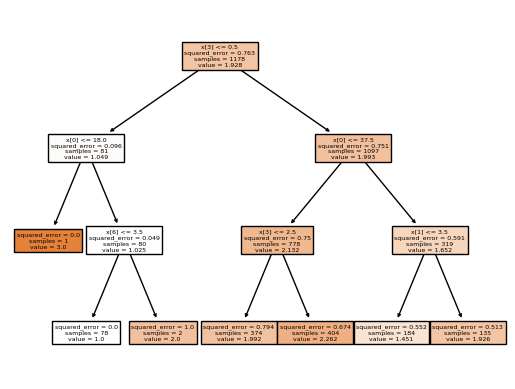

In [ ]:
#3:
# The terminal nodes have only 1 value, which would make sure in regression. However, the issue here is that a regression tree should not be used for classification because they are used to predict continuous values.
# A classification tree would be a better measure because they are used categorize (and in this case, we are trying to predict 1, 2, or 3, which is not a continuous sequence)
tree_model_method_regressor = tree.DecisionTreeRegressor()
tree_plot = tree_model_method_regressor.fit(X_train, y_train)
tree.plot_tree(tree_plot, filled = True)
plt.show()

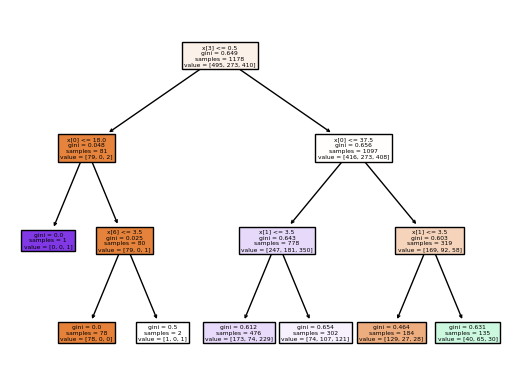

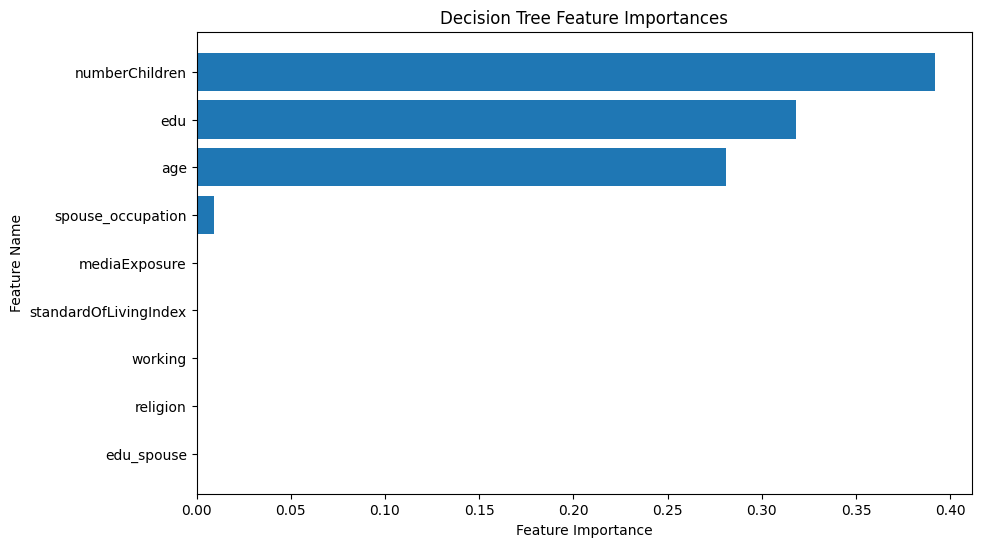

In [ ]:
#4:
# Here, the terminals have 3 values, which represents the 3 classes.
#It appears that the variables that are the most important are age and the number of children, however all variables are used
#Broadly speaking, those that are more likely to use no birth control are those that are very young and very old.
# Those that are most likely to use short term birth control would also be those on the younger side.
# Those that are more likely to use long term birth control would also be younger.
tree_model_method_classifier = tree.DecisionTreeClassifier().fit(X_train, y_train)
tree_plot2 = tree_model_method_classifier.fit(X_train, y_train)
tree.plot_tree(tree_plot2, filled = True)
plt.show()



feature_importance = tree_model_method_classifier.feature_importances_
your_feature_names = X_test.columns
top_n = 9
top_features_indices = feature_importance.argsort()[-top_n:][::-1]
top_feature_names = [your_feature_names[i] for i in top_features_indices]
top_feature_importance = feature_importance[top_features_indices]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importance, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Decision Tree Feature Importances')
plt.gca().invert_yaxis()
plt.show()


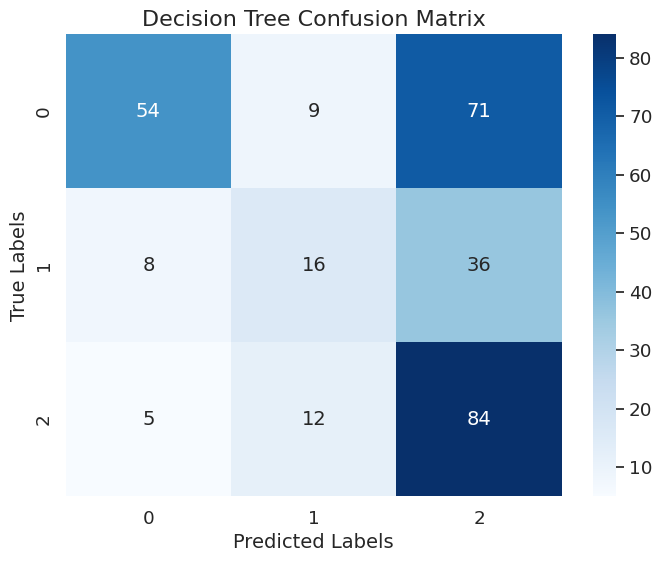

NameError: ignored

In [ ]:
#5:
from sklearn.metrics import confusion_matrix, classification_report
predictions = tree_model_method_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability

# Customize the heatmap using a color palette
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title("Decision Tree Confusion Matrix", fontsize=16)

plt.show()


accuracy = accuracy_score(y_test, predictions)
print(f'Overall Accuracy: {accuracy}')
print(f'Accuracy for 0 (no birth control): {74/134}')
print(f'Accuracy for 0 (no birth control): {20/60}')
print(f'Accuracy for 0 (no birth control): {43/101}')

In [ ]:
#6:
#A linear probability model cannot be used here because they are not meant to be used for multi class classification problems
#Specifically, they are suitable for binary prediction tasks, where they output a probability between 0 and 1
#This would not have much use here, as we are not looking for a single probabiltity, but rather a probability across 3 different classes

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?